# Libraries

In [5]:
import pandas as pd
import numpy as np
%matplotlib inline

# Data

In [6]:
returns = (
  pd.read_csv(
    '../data/Portfolios_Formed_on_ME_monthly_EW.csv',
    na_values = -99.99,
    index_col = 0
  )
  [['Lo 10', 'Hi 10']]
  .apply(lambda col: col / 100)
)
returns.columns = ['small_cap', 'large_cap']
returns.head()

,small_cap,large_cap
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


# Analysis

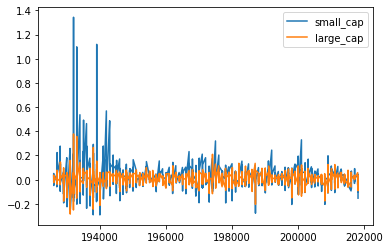

In [7]:
returns.plot.line();

Annualized volatility is the product of the volatility and the square root of number of periods $p$ for a given year (e.g. months, trading days).

$$\sigma_{p} = \sigma_{R} \sqrt{p}$$

Since these returns are monthly, to calculate the annualized volatility, the period is 12.

In [8]:
annualized_vol = returns.std() * np.sqrt(12)
annualized_vol

small_cap    0.368193
large_cap    0.186716
dtype: float64

In [13]:
n_months = len(returns)
annualized_return = (returns + 1).prod()**(12 / n_months) - 1
annualized_return

small_cap    0.167463
large_cap    0.092810
dtype: float64

In [23]:
(returns + 1).prod() - 1

small_cap    1.659582e+06
large_cap    3.674948e+03
dtype: float64

In [26]:
pd.Series([1, 2, 3]).cumprod()

0    1
1    2
2    6
dtype: int64

In [14]:
annualized_return / annualized_vol

small_cap    0.454825
large_cap    0.497063
dtype: float64

Large caps gave slightly higher returns per unit of volatility. What about excess returns over risk-free rate?

In [19]:
# This should really be based on a series rather than a constant
riskfree_rate = .03

excess_return = (annualized_return - riskfree_rate)
sharpe_ratio = excess_return / annualized_vol
sharpe_ratio

small_cap    0.373346
large_cap    0.336392
dtype: float64

Small caps gave a higher excess return (risk-adjusted return) per unit of volatility.

Consider that the returns will change depending on which basket you look at (e.g. deciles — smallest 20% vs. largest 20%).